<center><h1>Lab13:<br>Harmonic Motion</h1></center>
<a href="https://www.youtube.com/watch?v=j-zczJXSxnw">Click here to see a famous harmonic oscillator</href>

<h2>Simple Harmonic Motion</h2>
Simple harmonic motion plays a central role in much of physics and engineering. The description is used widely for disparate phenomena such as oscillations in an AC circuit, the bending of a bridge, and teh quantum mechanics of light. The prototypical simple harmonic oscillator is a mass on an ideal spring (i.e. one which obeys Hooke's Law). The restoring force provided by the spring is $F = -kx$ where $x$ is the displacement from equilibrium and $k$ is the spring constant.
<br>
The equation of motion for the mass is:<br>
$m \frac{d^2 x}{dt^2} = - kx$
<br>
which we can rewrite as:
<br>
$\frac{d^2x}{dt^2} + \omega^2 x = 0 \quad (1)$
<br>
where:
<br>
$\omega = \sqrt{\frac{k}{m}}$
<br>
is called the "angular frequency" of the system (not to be confused with the "frequency" $f = \frac{\omega}{2\pi}$)
<br>
Equation (1) is a second order differential equation to solve for $x(t)$. There are two very common forms for the general solution of this equation:
<h2 style="color:blue">Solution 1: Sines and Cosines</h2>
The solution of (1) will be a function which, when differentiated twice, will give us the original function times a constant. The obvious choice is either sine or cosine. However, this is a second-order differential equation, so there need to be two arbitrary constants in the full general solution. Let's use a linear combination of <i>both</i> sine and cosine:

In [5]:
import numpy as np
import sympy as sym

def x1(t):
    a * np.cos(ω*t) + b * np.sin(ω*t)

a, b, w, t, x, ω = sym.symbols('a b w t x ω')
x1 = sym.Eq(x, a * sym.cos(w * t) + b * sym.sin(w * t))

Right now, there appear to be three undetermined constants (A, B, and $\omega$), but we will see that one of them is fixed by the equation of motion (1)

In [6]:
eqn2 = sym.diff(x1.rhs, t, 2) + (ω**2 * eqn1.rhs)

We can collect the sine and cosine terms by simplifiying the equation.<br>
Collecting the sine and cosine terms:

In [ ]:
sym.simplify(eqn2)

Shows that the differential equation will be satisfied for all A and B if $w = \omega$. The constant A and B are (at this point) arbitrary constants and will be determined by the initial conditions. In fact, A is the intial displacement of the oscillator.

In [ ]:
x1.subs(t, 0)

and B is $v(0)/w$ as can be seen by differentiating $x(t)$ to get velocity and then checking the velocity at $t=0$.

In [ ]:
v1 = sym.diff(x1.rhs, t)
v1

In [ ]:
v1.subs(t, 0)

<h2 style="color:blue">Solution 2: Just Cosine</h2>
We chose a linear combination of sines and cosines above which solved equation (1), but this parameterization is not unqiue. Since $\sin(x + \phi)= \sin(x) + \cos(x)\sin(\phi)$, we can rewrite our solution so that it contains only cosines! However, since we still need <u>two</u> arbitrary constants, we pick up an extra piece in the argument of the cosine:

In [ ]:
x2, a2, ϕ = sym.symbols('x2, a2, ϕ')
x2 = sym.Eq(x2, a2 * sym.cos(w*t + ϕ))
x2

Here $\phi$ is a constant called the phase angle. <u>This solution is equivalent to Solution 1!</u> The only difference is how we parameterize it; sometimes the first solution is more convenient, sometimes not. $a_2$ is not, in general, the same constant as $a$ for a given set of initial conditions.<br>
Putting this back into our equation for simple harmonic motion gives

In [ ]:
eqn3 = sym.diff(x2.rhs, t, 2) + ω**2 * x2.rhs
eqn3

In [ ]:
sym.simplify(eqn3)

Which shows that, as before, this is a solution for all times $t$ if $\omega = w$. 
<br>
We can discover the physical signifigance of $\phi$ by looking at $x(0)$ and $v(0)$.

In [ ]:
x2.subs(t,0)

In [ ]:
v2 = sym.diff(x2.rhs, t)
v2.subs(t, 0)

We can see that the constant $a_2$ fixes the amplitude of the oscillations, while the phase angle $\phi$ allows us to set initial values $x(t)$ and $v(t)$. Note that, for a given amplitude, there is always a choice of $b$ and $\phi$ such that our two solutions coincide!

In [ ]:
#interactive plot

Note also that: <br>
$\frac{v(0)}{x(0)} = -w \tan(\phi)$
<br>
so that the phase angle $phi$ is given by $\phi = \arctan(\frac{v(0)}{w x(0)}$. Thus if $v(0) = 0, \phi = 0, or \pi$. If $x(0) = 0$, then $\phi = \frac{\pi}{2}$ or $\frac{3 \pi}{2}$. We can see this by looking at a plot of the tangent.

In [ ]:
from matplotlib import pyplot as plt

#might be wrong graph
x = np.linspace(0.0, 6.0, 1000)
y = (np.tan(2 * np.pi * x/5))

tol = 10
y[y > tol] = np.nan
y[y < -tol] = np.nan

plt.plot(x,y)

<h2>Energy Conservation in Simple Harmonic Motion</h2>
(Below, we are using <u>Solution 2</u>, $x(t) = A2 \cos(w t + \phi)$; it is more useful for now!)
<br><br>
Energy is conserved in simple harmonic motion since there are no dissipative forces. During the motion the energy sloshes back and forth between kinetic and potential energy. The kinetic energy is:

In [ ]:
KE, m = sym.symbols('KE m')
KE = sym.Eq(KE, 1/2 * m * v2**2)
KE

and the potential energy is:

In [ ]:
U, k = sym.symbols('U k')
U = sym.Eq(U, 1/2*k*x2.rhs**2)
U

The total energy is:

In [ ]:
Energy = KE.rhs + U.rhs
Energy

Since $\omega = \sqrt{\frac{k}{m}}$ we have:

In [ ]:
sym.simplify(Energy.subs(w, sym.sqrt(k/m)))

which does not depend on time! This shows that the energy is constant throughout the motion.
<br><br>
Suppose we start our oscillator with $v(0) = 0$ and $x(0) = 10$cm. Then $\phi = 0$ and $a_2 = 10$cm. Suppose further that $m = 0.1$kg and $k = 1$N/m so that $\omega = \sqrt{10}$sec$^{-1}$ and the total energy of the oscillator is $E = \frac{1}{2}(.1)^2$J$=0.05$J. We can plot the kinetic and potential energies as a function of time. With these values we have an oscillator with a period of just under two seconds. Recall that the period $T$ is given by $T = \frac{2 \pi}{\omega}$.

In [ ]:
KE2 = KE.subs(w, sym.sqrt(k/m))
U2 = U.subs(w, sym.sqrt(k/m))
p1 = sym.plot(KE2.subs({a2: .1, m: .1, ϕ: 0, k: 1}).rhs, (t,0,2), show=False)
p2 = sym.plot(U2.subs({a2: .1, m: .1, ϕ: 0, k:1}).rhs, (t,0,2), show=False)
p1.append(p2[0])
p1.show()

The blue is kinetic energy and orange is potential.

<h2>Animations!</h2>
We will animate the mass and spring system undergoing simple harmonic motion. We will need to make four objects: a mass, a spring, a surface for the mass to slide one, and a wall to anchor the spring to. Firstly, we need to setup our animation package, <b>manim</b>.

In [ ]:
from manim import *

config.media_width = "75%"
config.verbosity = "WARNING"

If manim is installed correctly, evaluating the cell above should produce a version number.

In [ ]:
%%manim -qm HarmonicOscillator
#this sucks, probably need to rework or remove
class HarmonicOscillator(Scene):
    def construct(self):
        mass = Rectangle(height=2.0, width=2.0)
        l1 = Line(LEFT, RIGHT)
        self.add(mass, l1)
        self.play(MoveAlongPath(mass, l1), rate_func=there_and_back)

<h2>Phase space plots</h2>

Another way of looking at the motion is to plot the particle's velocity versus the particle's position. This is called a <u>phase space plot</u>. This is useful because a particle undergoing simple harmonic motion will be any given position twice in a single period but will have different velocities depending on whether it is moving to the right or to the left (spring is expanding or contracting). You can see this from the plot below. Notice that the particle is at $x=0$ twice. Once at roughly $t = 0.5$ seconds and once at roughly $t=1.5$ seconds. When $t=0.5$ the particle has a velocity of $1.265$ to the left. At $t=1.5$ the particle has a velocity of $1.265$ to the right.

In [ ]:
#px2_1 = sym.plot(x2.subs({a2: .1, m: .1, ϕ: 0, k: 1}).rhs, (t,0,2), show=False)
x2s = x2.subs(w, sym.sqrt(k/m))
x2f = x2s.subs({a2: .1, m: .1, ϕ: 0, k: 1}).rhs
x = np.linspace(0,2,1000)
xeval = [x2f.subs(t, i) for i in x]

plt.plot(xeval)

v2s = v2.subs(w, sym.sqrt(k/m))
v2f = v2s.subs({a2: .1, m: .1, ϕ: 0, k: 1})
veval = [v2f.subs(t, i) for i in x]

plt.plot(veval)

plt.axhline(y=0, c="black", label="y=0")
plt.show()

We can easily make a phase space plot by simply plotting our xeval vs veval.<br><br>
Our plot is as shown:

In [ ]:
plt.plot(xeval,veval)
plt.axhline(y=0, c="black", label="y=0")
plt.axvline(x=0, c="black", label="y=0")
plt.show()

Now we should clear all of our varibles and move on to damped motion.

In [ ]:
%reset

<h2>Damped Harmonic Motion</h2>
Up until now we have assumed that our oscillator does not lose any energy. Thus, if our oscillator is a mass and spring system, it is one without friction. If our oscillator is a circuit, it is a circuit without resistance. However, most real systems have some dissipative forces and undergo <u>damped harmonic motion</u>.
<br><br>
The equation of motion for an object undergoing damped harmonic motion is:
$\frac{d^2 x}{dt^2} + \gamma \frac{dx}{dt} + \omega^2 x = 0 \quad$ (2)
<br>
where $\gamma$ is the <u>damping parameter</u>. Notice that the dissipative force is velocity-dependent, just as it is for air resistance. In sympy it is:

In [1]:
import sympy as sym
x, v, KE, U, ϕ, A, B, c, t, ω, γ = sym.symbols('x v KE U ϕ A B c t ω γ')
x = sym.Function('x')
damped = ω**2 * x(t) + γ * x(t).diff(t) + x(t).diff(t, 2)
damped

γ*Derivative(x(t), t) + ω**2*x(t) + Derivative(x(t), (t, 2))

To solve this equation we will guess that the solution is of the form:
<br>
$x(t) = A e^{Bt} \cos(ct + \phi)$
<br>
There is no guarantee that this will work, but it is not a completely arbitrary guess; we have some reasonable idea of what the function should do, even if we don't know exactly what it should look like. We call this kind of educated guess an "ansatz", and we do it all the time in physics.
<br>
<br>
It look again like we have more constants (A, B, c and $\phi$) than we need (only 2), but we will see that satisfying the equation of motion (2) will fix two of them for us.
<br>
<br>
We must substitute our ansatz for $x(t)$ into the equation and see if it works. This is tedious to do by hand, but it is easy with a computer. Our guess is:

In [2]:
class Ansatz(sym.Function):
    @classmethod
    def eval(cls, A, B, c, ϕ, t):
        return A * sym.E**(B*t) * sym.cos(c * t + ϕ)
x = Ansatz(A, B, c, ϕ, t)
x

A*exp(B*t)*cos(c*t + ϕ)

And putting this into the equation for the damped oscillator gives:

In [3]:
damped = ω**2 * x + γ * x.diff(t) + x.diff(t, 2)
damped

A*ω**2*exp(B*t)*cos(c*t + ϕ) + A*(B**2*cos(c*t + ϕ) - 2*B*c*sin(c*t + ϕ) - c**2*cos(c*t + ϕ))*exp(B*t) + γ*(A*B*exp(B*t)*cos(c*t + ϕ) - A*c*exp(B*t)*sin(c*t + ϕ))

Notice that each term has a factor of $A$ and a factor of $e^{Bt}$ in front of it. We can pull these out of the equation by using simplify.

In [4]:
sym.simplify(damped)

A*(B**2*cos(c*t + ϕ) - 2*B*c*sin(c*t + ϕ) - c**2*cos(c*t + ϕ) + γ*(B*cos(c*t + ϕ) - c*sin(c*t + ϕ)) + ω**2*cos(c*t + ϕ))*exp(B*t)

We want our damped equation to be equal to zero at all times $t$, so we can discard the overall factor of $A \quad e^{Bt}$. What we are left with is the final part of the damped equation.

In [5]:
newequation = (B**2*sym.cos(c*t + ϕ) - 2*B*c*sym.sin(c*t + ϕ) - c**2*sym.cos(c*t + ϕ) + γ*(B*sym.cos(c*t + ϕ) - c*sym.sin(c*t + ϕ)) + ω**2*sym.cos(c*t + ϕ))

We can collect the sine and cosine terms together, which gives:

In [6]:
newequation = sym.collect(newequation, [sym.sin(c*t + ϕ), sym.cos(c*t + ϕ)])
newequation

-2*B*c*sin(c*t + ϕ) + γ*(B*cos(c*t + ϕ) - c*sin(c*t + ϕ)) + (B**2 - c**2 + ω**2)*cos(c*t + ϕ)

The sine and cosine are 90 degress out of phase with each other. In other words, when the sine is zero, the cosine is one. Thus, the only way the equation can equal zero at all times is for the sine and cosine terms to vanish separately. The coefficient of the sine term is:

In [7]:
sincoeff = -c*(2*B + γ)

and requiring that this vanish gives:
<br>
$B = \frac{-\gamma}{2}$
<br>
Putting this back into the coefficient of the cosine term and requiring that this coefficient also vanishes giving two solutions for c.
<br>
$c = \frac{-1}{2} \sqrt{-\gamma^2 + 4 \omega^2} \ , \ \frac{1}{2} \sqrt{-\gamma^2 + 4 \omega^2}$
<br>
We want c to correspong to a frequency, so we throw away the negative solution as unphysical. As a result, our guess solves the equation if: $B = \frac{- \gamma}{2}$ and $c = \frac{1}{2} \sqrt{-\gamma^2 + 4 \omega^2}$. <br>
Notice that if the damping is small, $c$ (which is often called $\omega'$) is almost the same as $\omega$. With these values for $B$ and $c$ our solution is:

In [8]:
x = A * sym.E**(-(t*γ)/2) * sym.cos(ϕ + (1/2)*t*sym.sqrt(-γ**2 + 4*ω**2))
x

A*exp(-t*γ/2)*cos(0.5*t*sqrt(-γ**2 + 4*ω**2) + ϕ)

Thu, there are only two arbitrary constants $A$ and $\phi$ in our general solution, as expected. These constans are determined by the initial conditions.
<br>
<br>
In fact, $x(0) = A \cos(\phi)$ just as in the undamped case.

In [9]:
x.subs(t,0)

A*cos(ϕ)

The phase angle $\phi$ is a little more complicated. The velocity is:

In [10]:
v = sym.simplify(sym.diff(x, t))
v

-0.5*A*(γ*cos(0.5*t*sqrt(-γ**2 + 4*ω**2) + ϕ) + sqrt(-γ**2 + 4*ω**2)*sin(0.5*t*sqrt(-γ**2 + 4*ω**2) + ϕ))*exp(-t*γ/2)

so the initial velocity is:

In [11]:
v.subs(t,0)

-0.5*A*(γ*cos(ϕ) + sqrt(-γ**2 + 4*ω**2)*sin(ϕ))

If we substitute $A= \frac{x_0}{\cos(\phi)}$ into $v(0)$ and simplify we get:

In [12]:
x0 = sym.symbols('x0')
veq = sym.simplify(v.subs({t: 0, A: (x0/sym.cos(ϕ))}))
veq

-0.5*x0*(γ + sqrt(-γ**2 + 4*ω**2)*tan(ϕ))

Solving this for the initial velocity in terms of $\phi$ gives:

In [13]:
#this is different
phiinitial = sym.solve(veq, ϕ)[0]
phiinitial

-atan(0.5*γ/sqrt(-0.25*γ**2 + ω**2))

If the damping factor gamma is zero, we recover our previous result:
<br>
$-\arctan(\frac{v_0}{x_0 \omega}) + \pi C, \ C \in \mathbb Z$
<br>
In general $\phi$ is given by:
<br>
$\phi = - \arctan(\frac{v_0}{x_0 \omega})$
<br>
All damped oscillators fall into one of three special cases:
<br>
a) if $4 \omega^2 - \gamma^2 > 0$, the oscillator is <u>underdamped</u>.<br>
b) if $4 \omega^2 - \gamma^2 = 0$, the oscillator is <u>critically damped</u>.<br>
c) if $4 \omega^2 - \gamma^2 < 0$, the oscillator is <u>overdamped</u>.<br>
We will look at each of these cases in turn.

<h2>Underdamping</h2>
If $\gamma<2\omega$ the oscillator is underdamped.

In [14]:
k, m = sym.symbols('k m')

def DampedMotion(m, k, ω, v0, γ, ϕ, A):
    return A * sym.E**(-(t*γ)/2) * sym.cos(ϕ + (1/2)*t*sym.sqrt(-γ**2 + 4*ω**2))

DampedMotion(0.1, 1, sym.sqrt(k/m), 0, 0.1, ϕ, A)            

A*exp(-0.05*t)*cos(1.0*t*sqrt(k/m - 0.0025) + ϕ)

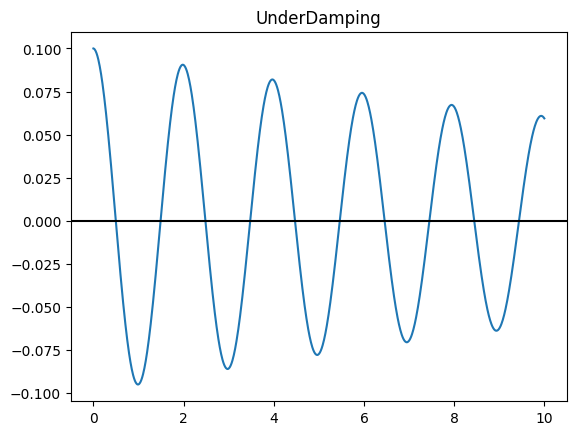

In [15]:
from matplotlib import pyplot as plt
import numpy as np
x = np.linspace(0,10,1000)

dampedEval = [DampedMotion(0.1, 1, sym.sqrt(1/.1), 0, 0.1, 0, 0.1).subs(t,i) for i in x]
plt.plot(x, dampedEval)
plt.axhline(color="black")
plt.title("UnderDamping")
plt.show()

We can plot the <u>damping envelope</u>, which is $e^{( - \frac{\gamma}{2}t)}$, along with the position of the oscillator.

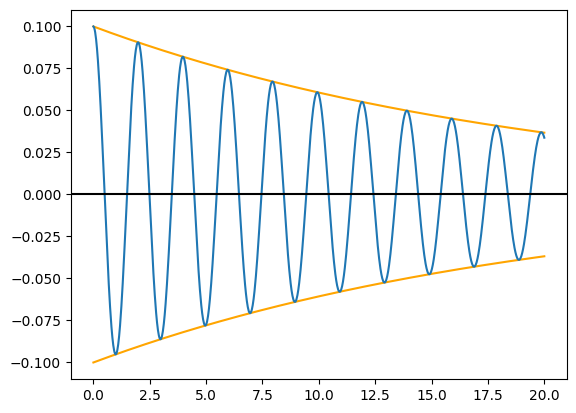

In [16]:
def Envelope(A, γ):
    return A* sym.E**((-γ*t)/2)

x2 = np.linspace(0, 20, 1000)

envelopeEval = [(Envelope(.1, .1).subs(t, i), -Envelope(.1,.1).subs(t, i)) for i in x2]
dampedEval2 = [DampedMotion(0.1, 1, sym.sqrt(1/.1), 0, 0.1, 0, 0.1).subs(t,i) for i in x2]

plt.plot(x2, envelopeEval, color="orange")
plt.plot(x2, dampedEval2)
plt.axhline(color="black")
plt.show()

The phase space plot for damped oscillator is very different from the phase space plot for the undamped oscillator. The motion of the undamped oscillator is periodic, and as a result the phase space plot is closed. The damped oscillator's motion is not periodic, therefore its phase plot is not closed. The phase space plot spirals in as the particle loses energy.

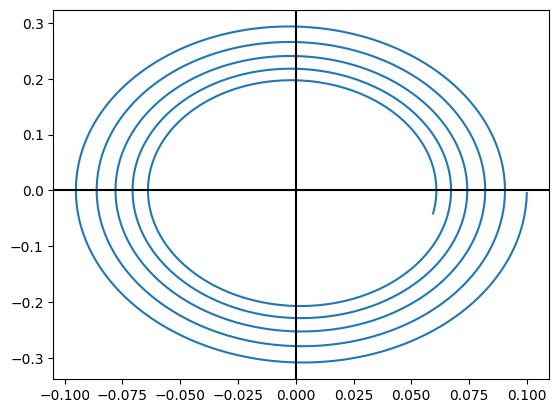

In [17]:
def DampedVel(m, k, ω, v0, γ, ϕ, A):
    return -0.5*A*(γ*sym.cos(0.5*t*sym.sqrt(-γ**2 + 4*ω**2) + ϕ) + sym.sqrt(-γ**2 + 4*ω**2)*sym.sin(0.5*t*sym.sqrt(-γ**2 + 4*ω**2) + ϕ))*sym.exp(-t*γ/2)

dampedVelEval = [DampedVel(0.1, 1, sym.sqrt(1/.1), 0, 0.1, 0, 0.1).subs(t,i) for i in x]
plt.plot(dampedEval,dampedVelEval)
plt.axhline(color="black")
plt.axvline(color="black")
plt.show()

Try a few different values of $\gamma$ (for both functions) and see what happends to the plots. Check to see that you result reduceds to the previous (UNDAMPED) result for $\gamma = 0$.

<h2>Critical Damping</h2>
if $\gamma = 2 \omega$ the oscillator is siad to be critically damped. When the oscillator is critically damped the $\sqrt{4 \omega^2 - \gamma^2}$ term is zero. The solution in this case is:

In [45]:
def xCritical(x0, B, γ):
    return (x0 + B*t)*sym.E**(-(γ*t)/2)

xCritical(x0, B, γ)

(B*t + x0)*exp(-t*γ/2)

Where $x0$ and $v0$ are fixed by the initial conditions. Putting $t = 0$ we see that $x0 = x(0)$ and if we take a derivative we see that $v(0) = b- \gamma \frac{x(0)}{2}$.

In [46]:
def vCritical(x0, B, γ):
    return sym.simplify(sym.diff(xCritical(x0, B, γ),t))
vCritical(x0, B, γ)

(B - γ*(B*t + x0)/2)*exp(-t*γ/2)

In [47]:
vCritical(x0, B, γ).subs(t,0)

B - x0*γ/2

So in terms of $v0$ and $x0$ we have:

In [50]:
v0 = sym.symbols('v0')
v0Crit = sym.Eq(v0, vCritical(x0, B, γ).subs(t,0))
newB = sym.solve(v0Crit,B)[0]
newB

v0 + x0*γ/2

or:

In [51]:
sym.simplify(xCritical(x0, newB, γ))

(t*(2*v0 + x0*γ)/2 + x0)*exp(-t*γ/2)

and:

In [52]:
sym.simplify(vCritical(x0, newB, γ))

(-t*v0*γ/2 - t*x0*γ**2/4 + v0)*exp(-t*γ/2)

The starting conditions for our critically damped oscillator are:
<br>
$x = 0.1, \quad \gamma = 0.632456, \quad v0 = 0$

In [54]:
xCritical(x0, newB, γ).subs({x0: 0.1, γ: 0.632456, v0: 0})

(0.0316228*t + 0.1)*exp(-0.316228*t)

Notice that the critically damped oscillator does not oscillate bu slowly moves toward the origin. (Note: These plots may take some time to evalute)

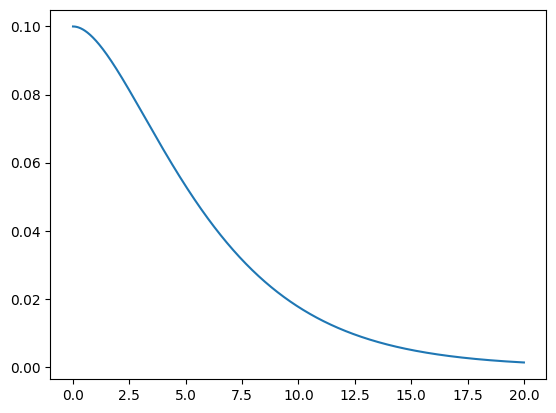

In [59]:
x = np.linspace(0,20,1000)
criticalEval = [xCritical(x0, newB, γ).subs({x0: 0.1, γ: 0.632456, v0: 0, t: i}) for i in x]
criticalEval

plt.plot(x, criticalEval)
plt.show()

The velocity of the critically damped oscillator starts at $v_0$ and then slowly dies off.

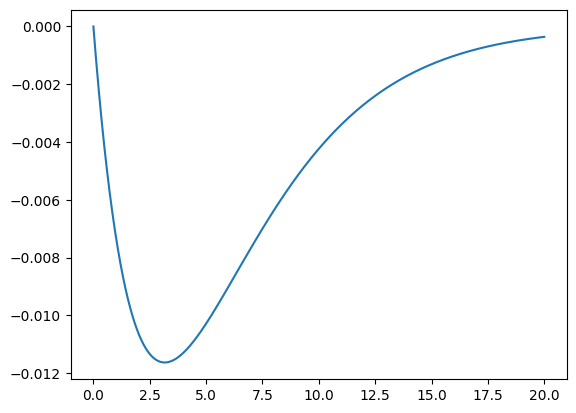

In [61]:
criticalVelEval = [vCritical(x0, newB, γ).subs({x0: 0.1, γ: 0.632456, v0: 0, t: i}) for i in x]
plt.plot(x,criticalVelEval)
plt.show()

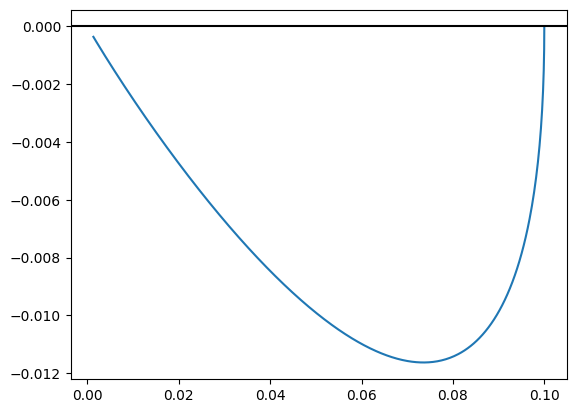

In [65]:
plt.plot(criticalEval, criticalVelEval)
plt.axhline(color="black")
plt.show()

<h2>Overdamping</h2>
If $\gamma > 2 \omega$ the oscillator is overdamped. The conditions given below are for a slightly overdamped oscillator.
<br>
$x_0 = 0.1, m = 0.1, \omega = \sqrt{\frac{k}{m}}, v_0 =0, k = 1, \gamma = 2.1 \omega$
<br>
Plotting the position and velocity of the object shows that the motion has the same basic features as in the critically damped cases but that the damping is much faster.

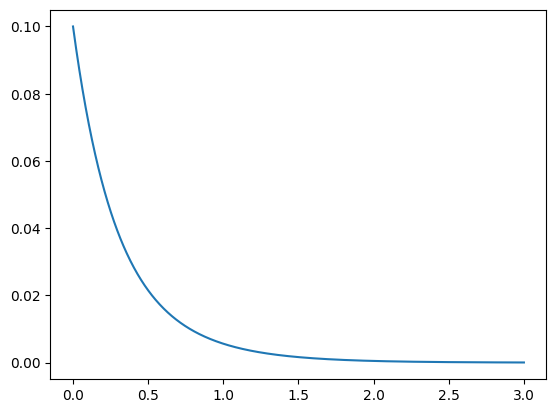

In [74]:
x = np.linspace(0,3,1000)

#DampedMotion(m, k, ω, v0, γ, ϕ, A):

overEval = [DampedMotion(0.1, 1, sym.sqrt(1/0.1), 0, 2.1*sym.sqrt(1/0.1), 0, 0.1).subs(t,i) for i in x]
plt.plot(x, overEval)
plt.show()

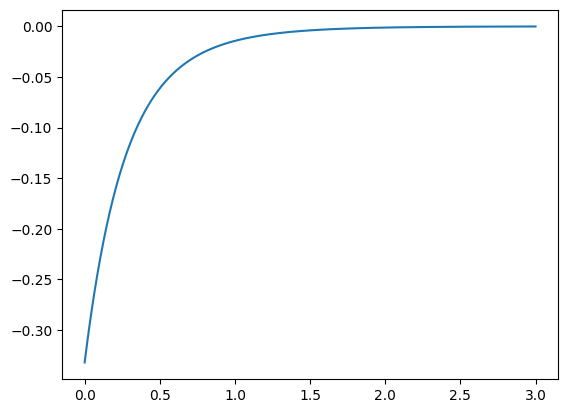

In [78]:
overVelEval = [DampedVel(0.1, 1, sym.sqrt(1/0.1), 0, 2.1*sym.sqrt(1/0.1), 0, 0.1).subs(t,i) for i in x]
plt.plot(x,overVelEval)
plt.show()

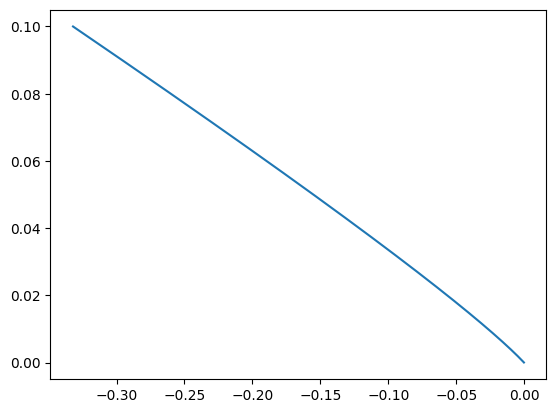

In [80]:
plt.plot(overVelEval, overEval)
plt.show()

<h2>Exercies</h2>
The assignment for Week 13 is to complete the following problems. <u>The submission should include your input code, the relevant outputs, and some senteces which explain the results.</u> The code should be self-contained and should run "in order"; that is, I should be able to simply run your notebook from beginning to end in order to reproduce your outputs.
<h3>Problem One</h3>
From the following "data", find the starting conditions ($x0$ and $v0$), the angular frequency ($\omega$), and the period ($T$) of the oscillator. What is the phase angle ($\phi$) of the oscillator? What is amplitude ($A$)? Like all real data this data is not perfect but contains some "experimental: error; address the uncertainties of your calculations. You may use any method that you like to answer these questions.

In [87]:
dataSet1 = [[0, 0.5007776925563694], [0.5,      0.07742815827440693], [1., -0.413584076045498], [1.5,  -0.970880077628931], [2., -1.427905897450215], [2.5,  -1.614187578884817], [3., -1.873309477976028], [3.5,  -2.125613127508216], [4., -2.077313469733259], [4.5,  -2.225554012692775], [5., -2.061611821977329], [5.5,  -1.749505039520971], [6., -1.247817516855952], [6.5,  -0.985048477974823], [7., -0.3159756622310341], [7.5,      0.1643852283418942], [8., 0.624324772578878], [8.5,      1.096653472449683], [9., 1.55835001695052], [9.5,      2.012382217257147], [10., 2.233827000161716], [10.5,      2.359710166791859], [11., 2.419682428405658], [11.5,      2.304856409123272], [12., 2.25886573337408], [12.5,      1.859750478068737], [13., 1.48342571348667], [13.5,      1.06579772626519], [14., 0.7267722015857766], [14.5,      0.1612622907381281], [15., -0.3812241116005161], [15.5,  -0.7732634623668103], [16., -1.17744653711769], [16.5,  -1.6508772881197], [17., -1.962422370149177], [17.5,  -2.090302143351792], [18., -2.267216994175503], [18.5,  -2.158067825327134], [19., -1.969035179061759], [19.5,  -1.629114965868283], [20., -1.336508990290723], [20.5,  -0.835208360401679], [21., -0.3514165153633562], [21.5,      0.1452373685185685], [22., 0.6510632973657097], [22.5,      1.013401529531922], [23., 1.464601152454333], [23.5,      1.892557058408631], [24., 2.059083658448213], [24.5,      2.252665499155034], [25., 2.358012070433671], [25.5,      2.36307066555448], [26., 2.201601457443672], [26.5,      2.012836180050034], [27., 1.729172138657275], [27.5,      1.257514195492626], [28., 0.7374704040637625], [28.5,      0.1533556902541086], [29., -0.2627556743819337], [29.5,  -0.853631191599124], [30., -1.234658946971961], [30.5,  -1.50473605361065], [31., -1.984231016008978], [31.5,  -2.105619747956838], [32., -2.063942531348357], [32.5,  -2.249722143635239], [33., -2.048729763297899], [33.5,  -1.719335929553208], [34., -1.500065698979411], [34.5,  -0.925258916057525], [35., -0.4065005216048198], [35.5,      0.1216557054449484], [36., 0.6276647313931692], [36.5,      1.016133168453524], [37., 1.477957914315689], [37.5,      1.83822731987168], [38., 2.139743723755296], [38.5,      2.416103980648914], [39., 2.453236781637697], [39.5,      2.454596086273386], [40., 2.36473183501149]]

<h3>Problem Two</h3>
From the following "data" find the starting conditions ($x_0$ and $v_0$), the angular frequency ($\omega$), and the period ($T$) of the oscillator. This data represents a <u>damped</u> oscillator. What is the phase angle ($\phi$) of the oscillator? What is the amplitude ($A$)? What is the damping parameter ($\gamma$)? Like all read data this data is not perfect but contains some "experimental" error; address the uncertainties of your calculations. You may use any method that you like you answers these questions.

In [88]:
dataSet2 = [[0, 0.3193722795950542], [0.1, 0.3550170947895908], [0.2,      0.359319911305495], [0.3, 0.3257610184406725], [0.4,      0.2472255265198468], [0.5, 0.1716209379381588], [0.6,      0.06864677926733205], [0.7, -0.02861740736192995], [0.8,  -0.1214332836364579], [0.9, -0.2125010299644887], [1.,  -0.2666055454308553], [1.1, -0.2920439474515537], [1.2,  -0.3042094508765891], [1.3, -0.2684347604534956], [1.4,  -0.2028448636084926], [1.5, -0.1336555616840449], [1.6,  -0.03641367813992585], [1.7, 0.06066870100805117], [1.8,      0.155640536898264], [1.900000000000001, 0.2263182530489035], [2.,      0.2753900119946367], [2.1,      0.3073963958486089], [2.200000000000001,      0.3045533742560063], [2.300000000000001,      0.2785698195756387], [2.400000000000001,      0.216576526178764], [2.500000000000001,      0.1465178699416696], [2.600000000000001,      0.05729247134027969], [2.700000000000001, -0.04955890944874731],  [2.800000000000001, -0.1208789872280683], [2.900000000000001,  -0.1930059509388532], [3.000000000000001, -0.2392471120378638],  [3.100000000000001, -0.260499747126543], [3.200000000000001,  -0.2490832090930726], [3.300000000000002, -0.2130392278057528],  [3.400000000000002, -0.1629783669149952], [3.500000000000002,  -0.0960278654438621], [3.600000000000002, -0.02059796126475917],  [3.700000000000002, 0.06282856280795223], [3.800000000000002,      0.1284870816258542], [3.900000000000002,      0.1975042417853844], [4.000000000000002,      0.2551508112561441], [4.100000000000002,      0.2740458531010875], [4.200000000000001,      0.2524979789824213], [4.300000000000001,      0.2334220716040493], [4.400000000000001,      0.1764898117704854], [4.5, 0.1041105570268226], [4.6,      0.03848996565505525], [4.7, -0.03189902904900295],  [4.799999999999999, -0.1018271691448462], [4.899999999999999,  -0.1694826890669834], [4.999999999999999, -0.1952714085061705],  [5.099999999999998, -0.2126367167465257], [5.199999999999998,  -0.2169753344139136], [5.299999999999998, -0.1949171236102164],  [5.399999999999997, -0.1356387967891012], [5.499999999999997,  -0.07582428358441352], [5.599999999999996,      0.0006895649657628067], [5.699999999999996,      0.05852451279631652], [5.799999999999996,      0.1369773763701157], [5.899999999999995,      0.1897151584489439], [5.999999999999995,      0.2105572844421678], [6.099999999999995,      0.2354278229762269], [6.199999999999994,      0.2271692765833738], [6.299999999999994,      0.1932538066724886], [6.399999999999994,      0.1442873122054465], [6.499999999999993,      0.0975233399219265], [6.599999999999993,      0.02291881129180233], [6.699999999999993, -0.03362721276600639],  [6.799999999999992, -0.089557876366281], [6.899999999999992,  -0.1437815405703866], [6.999999999999992, -0.1682840271932921],  [7.099999999999991, -0.1768641959918271], [7.199999999999991,  -0.190256758937183], [7.29999999999999, -0.1592448465664785],  [7.39999999999999, -0.0974361710199097], [7.49999999999999,  -0.06394978199565939], [7.599999999999989,      0.01077317120905434], [7.699999999999989,      0.05665892786622928], [7.799999999999989,      0.1181335805450456], [7.899999999999988,      0.1670046399006054], [7.999999999999988,      0.2018569312069027], [8.09999999999999,      0.2095899862778532], [8.19999999999999,      0.1936482854944579], [8.29999999999999,      0.1723479125514689], [8.39999999999999,      0.1274452355013285], [8.49999999999999,      0.0634990806764053], [8.59999999999999,      0.02591076815416984], [8.69999999999999, -0.04395095830128753],  [8.79999999999999, -0.0942399345852132], [8.89999999999998,  -0.132347480240578], [8.99999999999998, -0.1534342598879324],  [9.09999999999998, -0.1589631836216739], [9.19999999999998,  -0.1531872244958797], [9.29999999999998, -0.1198608278083601],  [9.39999999999998, -0.0841070619288202], [9.49999999999998,  -0.03699821549112412], [9.59999999999998,      0.00843640692236941], [9.69999999999998,      0.06407207967884739], [9.79999999999998,      0.1131144789284449], [9.89999999999998,      0.1437273161559993], [9.99999999999998,      0.1693100456127073], [10.09999999999998,      0.1690519457129477], [10.19999999999998,      0.1554784689823294], [10.29999999999998,      0.145298338313565], [10.39999999999998,      0.1052267393895641], [10.49999999999998,      0.05579189231397569], [10.59999999999998,      0.01031247961751554], [10.69999999999998, -0.02801390412396369],  [10.79999999999998, -0.06933763485107383], [10.89999999999998,  -0.1181953384967297], [10.99999999999998, -0.1280089301531122],  [11.09999999999998, -0.1344700114316373], [11.19999999999998,  -0.1235032245982427], [11.29999999999998, -0.0926741771159828],  [11.39999999999997, -0.07709303346283342], [11.49999999999997,  -0.03906275536648412], [11.59999999999997,      0.01076620322412379], [11.69999999999997,      0.05410447664896485], [11.79999999999997,      0.1014355687027829], [11.89999999999997,      0.1273947978391758], [11.99999999999997, 0.1560234191440921]]